<a href="https://colab.research.google.com/github/alexanderbandeiralira/SimulacoesEconomicas/blob/main/SimulacoesEconomicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
#/content/drive/MyDrive/Teste DS/data.csv
data = pd.read_csv('/content/drive/MyDrive/Teste DS/data.csv')
data.columns

Index(['Unnamed: 0', 'initial_age', 'weight', 'family_kind', 'race',
       'marital_status', 'accumulated_capital', 'annual_contribution',
       'income'],
      dtype='object')

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47626 entries, 0 to 47625
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           47626 non-null  int64  
 1   initial_age          47626 non-null  int64  
 2   weight               47626 non-null  int64  
 3   family_kind          47626 non-null  int64  
 4   race                 47626 non-null  int64  
 5   marital_status       47626 non-null  int64  
 6   accumulated_capital  47626 non-null  float64
 7   annual_contribution  47626 non-null  float64
 8   income               47626 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 3.3 MB


In [108]:
data['initial_age'] = data['initial_age'].astype(int)
data['weight'] = data['weight'].astype(int)
data['income'] = data['income'].astype(float)
data['family_kind'] = data['family_kind'].astype('object')
data['race'] = data['race'].astype('object')
data['marital_status'] = data['marital_status'].astype('object')
data['annual_contribution'] = data['annual_contribution'].astype(float)
data['accumulated_capital'] = data['accumulated_capital'].astype(float)


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47626 entries, 0 to 47625
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           47626 non-null  int64  
 1   initial_age          47626 non-null  int64  
 2   weight               47626 non-null  int64  
 3   family_kind          47626 non-null  object 
 4   race                 47626 non-null  object 
 5   marital_status       47626 non-null  object 
 6   accumulated_capital  47626 non-null  float64
 7   annual_contribution  47626 non-null  float64
 8   income               47626 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 3.3+ MB


In [110]:
# Adjust current year income for inflation
current_year = 2023
initial_year = 2020
inflation_rate = 0.044
years_passed = current_year - initial_year
data['income_adjusted'] = data['income'] * (1 + inflation_rate) ** years_passed

# Calculate additional retirement savings due to Saver's Match
max_match_income = 10000
data['additional_retirement_savings'] = 0.5 * pd.Series([min(max_match_income, 0.5 * income_adjusted) for income_adjusted in data['income_adjusted']])



# **Calcular a coluna "new_accumulated_capital" com base na fórmula fornecida:**





In [111]:
# Calculate new accumulated capital
data['new_accumulated_capital'] = data['accumulated_capital'] + data['additional_retirement_savings']

# **Criar faixas de idade (age cohorts) e atribuir cada pessoa a uma faixa:**

In [112]:
age_bins = [35, 40, 45, 50, 55, 60, 65]
age_labels = ['35-39', '40-44', '45-49', '50-54', '55-59', '60-64']
data['age_cohort'] = pd.cut(data['initial_age'], bins=age_bins, labels=age_labels, right=False)

In [113]:
data.sample(10)

,Unnamed: 0,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,income_adjusted,additional_retirement_savings,new_accumulated_capital,age_cohort
17540,17540,48,471,1,1,1,-145316.153464,0.15,46004.81,52348.559730,5000.000000,-140316.153464,45-49
25201,25201,46,2703,1,1,1,-20722.557528,0.09,9957.58,11330.662411,2832.665603,-17889.891925,45-49
44611,44611,42,2569,2,2,1,508252.124673,0.31,65432.60,74455.309551,5000.000000,513252.124673,40-44
11832,11832,48,2842,2,1,4,304630.874987,0.21,74734.42,85039.787128,5000.000000,309630.874987,45-49
38055,38055,39,954,3,1,5,-11646.025594,0.31,76835.38,87430.455192,5000.000000,-6646.025594,35-39
10378,10378,45,3083,3,1,3,-210504.764312,0.31,6916.42,7870.147176,1967.536794,-208537.227519,45-49
32335,32335,44,1173,1,1,1,-65133.191633,0.12,114698.29,130514.402407,5000.000000,-60133.191633,40-44
37151,37151,47,1690,2,1,5,121308.164962,0.31,82196.10,93530.381941,5000.000000,126308.164962,45-49
371,371,46,582,1,1,1,82270.077478,0.02,82921.53,94355.843794,5000.000000,87270.077478,45-49
45578,45578,35,1940,2,2,5,-234823.809143,0.00,89908.12,102305.836934,5000.000000,-229823.809143,35-39


# **Calcular o Weighted Average Retirement Savings Shortfall por raça (race) e faixa etária (age cohort):**



In [114]:
# Calculate weighted average retirement savings shortfall by race and age cohort
weighted_avg_shortfall = data.groupby(['race', 'age_cohort'])['new_accumulated_capital'].sum() / data.groupby(['race', 'age_cohort'])['weight'].sum()

# **Calcular o impacto em pontos percentuais do novo cenário na Retirement Readiness Rating por faixa etária:**



In [115]:
# Calculate retirement readiness rating and impact percentage
total_persons = data.groupby('age_cohort')['weight'].sum()
persons_afforded_retirement = data[data['new_accumulated_capital'] >= 0].groupby('age_cohort')['weight'].sum()
retirement_readiness_rating = persons_afforded_retirement / total_persons
previous_readiness_rating = 0.7  # Previous retirement readiness rating
impact_percentage = ((retirement_readiness_rating / previous_readiness_rating) - 1) * 100

In [116]:
# Generate the new_scenario.csv file with the new column new_accumulated_capital
data.to_csv('new_scenario.csv', index=False)

# **Gerar o gráfico do Weighted Average Retirement Savings Shortfall por raça e faixa etária:**

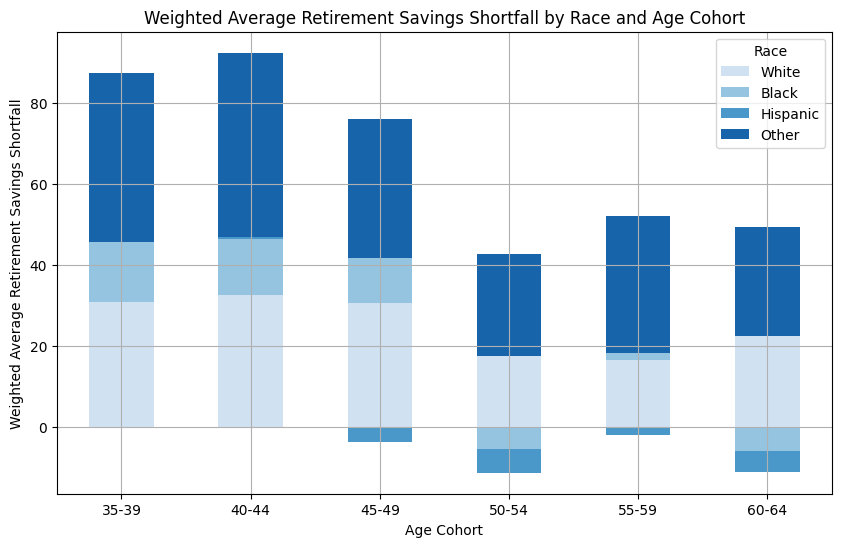

In [119]:
# Calcular a média ponderada das falhas de economia de aposentadoria por raça e faixa etária
weighted_avg_shortfall = data.groupby(['race', 'age_cohort'])['new_accumulated_capital'].sum() / data.groupby(['race', 'age_cohort'])['weight'].sum()

# Reorganizar os dados para ter as raças como colunas
weighted_avg_shortfall = weighted_avg_shortfall.unstack(level='race')

# Definir os nomes das raças correspondentes
race_names = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Other'}

# Definir a paleta de cores azul
colors = sns.color_palette('Blues', n_colors=len(race_names))

# Plotar o gráfico de barras agrupado por raça e faixa etária
ax = weighted_avg_shortfall.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Ajustar a legenda com os nomes das raças
handles, labels = ax.get_legend_handles_labels()
labels = [race_names[int(label)] for label in labels]
ax.legend(handles, labels, title='Race')

# Configurar os rótulos e o título do gráfico
plt.xlabel('Age Cohort')
plt.ylabel('Weighted Average Retirement Savings Shortfall')
plt.title('Weighted Average Retirement Savings Shortfall by Race and Age Cohort')

# Girar os rótulos do eixo x em 90 graus
plt.xticks(rotation=360)
plt.grid(True)
plt.show()

# **Gerar o gráfico do impacto em pontos percentuais do novo cenário na Retirement Readiness Rating por faixa etária:**

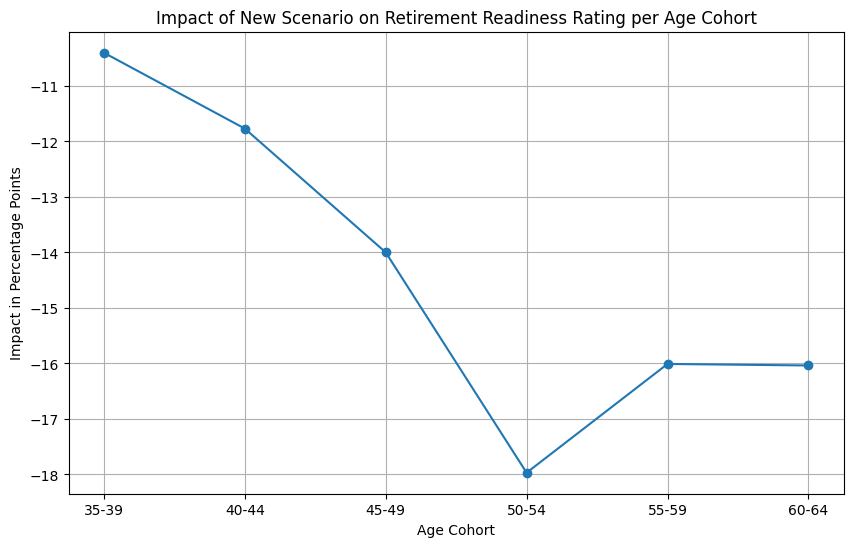

In [118]:
impact_percentage.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Age Cohort')
plt.ylabel('Impact in Percentage Points')
plt.title('Impact of New Scenario on Retirement Readiness Rating per Age Cohort')
plt.grid(True)
plt.show()
